## Insatalling dependencies

In [ ]:
!pip install Arabic-Stopwords


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 6.7 MB/s eta 0:00:00


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.5 MB/s eta 0:00:00


In [ ]:
pip install Tashaphyne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 KB 13.0 MB/s eta 0:00:00


In [ ]:
pip install PyArabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=dc107ac2f9c9f9e2d018f89e09909c708f131a2115c79bdefd52c8efe2411107
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## importing libaraires

In [ ]:
# Add environment Packages paths to conda
import os, sys, warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/tweets_pre10.csv')

df.head()

,N,Tweet
0,0.0,@m0kama1 ÙØ§ÙÙÙÙ Ù Ù ÙÙ Ø§Ø¨ÙÙ Ø§Ø®Ø¯...
1,1.0,@hhgffbhgfyhhhgg 3.5 ÙØ°Ù ÙØ³Ø®Ø© \nØ§Ø±Ø¨...
2,2.0,@Laila_Aljabir @shamanipoet1 @udbbb @kamnapp @...
3,3.0,ØªÙÙ ÙØ­Ù Ø¨Ø³ÙØ·Ù Ø­ÙÙ Ø§Ø³ØªØ®Ø¯Ø§Ù ...
4,4.0,@THEWOLFOFTASI Ø±Ø¯ Ø´Ø§Øª Ø¬Ù Ø¨Ù ØªÙ ÙÙ...


## Assessing

In [ ]:
 df.rename(columns = {'Sentiment':'label'}, inplace = True)

In [ ]:
#print the shape of the data set
df.shape

In [ ]:
df.info()

In [ ]:
#check if the data is balanced or not
df.label.value_counts()

1    502
0    498
Name: label, dtype: int64

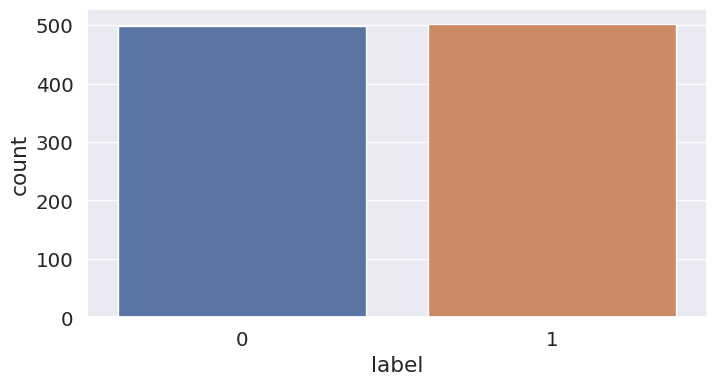

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=df);

The differences between the labels is not large so, we can say that the data is balanced

In [ ]:
#print the number of null values in each column
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
#to get the index of the null value
df[df['text'].isnull() == True]

,text,label


there is no null values in the data

In [ ]:
#print the number of duplicated values
df.duplicated().sum()

2

there is duplication in the data

In [ ]:
#print the rows which are duplicated
df[df['text'].duplicated() == True]

,text,label
53,د.خالد الغنيم يعطي مثال على عدم مصداقية المعلو...,0
766,شات جي بي تي وغوغل.. أيهما يعطي أجوبة أدق حول ...,1
864,حسنا، النص السابق ليس من كتابتنا، لكننا فضَّلن...,1


In [ ]:
df[df['text'] == df.iloc[76]['text']]

,text,label
76,خبراء يحذرون من استخدام البيانات السرية على من...,0


In [ ]:
#removing duplicated values
index = df[df['text'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
stopwords.words('arabic')

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [ ]:
# #are there any stop words in the data?
# arabic_stopwords = stopwords.words("arabic")
# len(arabic_stopwords)

Note that There are different libraries provide a different numbers of arabic stop words like "nltk" and "arabicstopwords" now we will use nltk's arabic stopwords and we will see the results and if needed we can use "arabicstopwords" library which provide the stopwords and it's conjugations

In [ ]:
df['stop_words'] = df['text'].apply(lambda x: len(set(x.split()) & set(stopwords.words('arabic'))))
df.stop_words.value_counts()

2     212
3     194
4     111
1      93
5      85
6      82
7      77
0      38
8      36
9      33
10     18
11     11
12      4
14      2
13      1
Name: stop_words, dtype: int64

<Axes: ylabel='Frequency'>

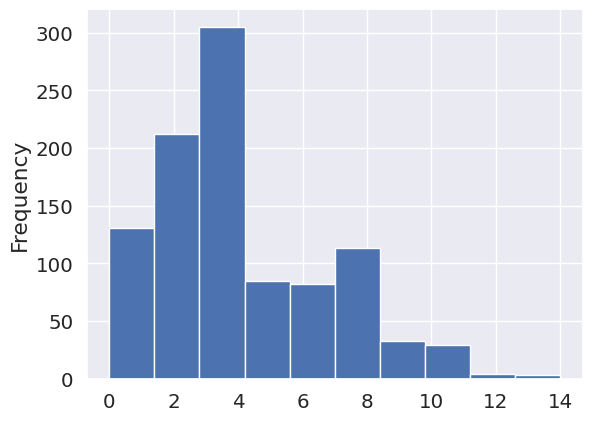

In [ ]:
df['stop_words'].plot(kind= 'hist')

it seems that the data contains alot of stop words and it should be removed

In [ ]:
#to count the number of emojis in the dataset
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['emoji_count'] = df['text'].apply(lambda x: emoji_counter(x))
df.emoji_count.value_counts()[:10]

0    828
1    109
2     37
3     12
4      5
5      3
8      2
7      1
Name: emoji_count, dtype: int64

most of the records doesn't contain emojies but there are emoji that we should take care during preprocessing

**extract the emojis from every text**

In [ ]:
emojis_data = df[df['emoji_count'] > 0]

In [ ]:
def extract_emoji(text):
    import emoji
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.distinct_emoji_list(char) for char in word):
            emoji_list.append(word)

    return emoji_list

In [ ]:
emojis_data['emoji'] = emojis_data['text'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join([word for word in x ]))

In [ ]:
emojis_data

,text,label,stop_words,emoji_count,emoji
3,شات جي بي تي يحب يتفلسف \nدكتور عادل شخبارك 🤣 ...,0,2,1,🤣
6,تابع..\nوللعلم ترى شات جي.بي.تي بالعرب ضعيف جد...,0,5,4,💯 💯 👌 🤓
7,ادخل على الموقع الرهيب https://t.co/azZA9hVYMA...,0,6,3,👍 😍 👏
9,نزلت الذكاء الصناعي شات.جي.بي.تي على جوالي بهد...,0,8,2,🤖 ✌️
10,▪️ #ألمانيا: قد نحظر روبوت شات جي بي تي بسبب م...,0,3,2,▪️ 👇
...,...,...,...,...,...
968,خديعة البطاريق التي تتبول لم تختلف كثيرا عن إف...,1,9,2,👇 👇
987,🚨 الشات جي بي تي 4 | #ChatGPT4 \nالاصدار الجدي...,1,8,2,🚨 😱
990,@karramli @TrueXela انت عايز تتخانق فعلا ياعم ...,1,3,2,😂 😂
993,شات جي.بي.تي 🤖\n\nذكاء صناعي ولكن!!! 🤔\n\n(...,1,1,2,🤖 🤔


In [ ]:
#find most repeated emojis
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]

😂     38
👇     35
🤣     12
🤖     12
😭     11
👇🏻     8
😅      7
👏      6
📍      6
🔥      6
dtype: int64

Green Heart and Face With Tears of Joy are the most repeated emoji

### Assessing Results

- The data contains null values
- The data contains duplicated values
- The data is balanced and contains 2 classes
- the data contains emojis
- Most of the records contains stopwords
- the data contains Diacritics
- The data contains Punctuations, Disapprobation words and hashtags and other things that we should take care during cleaning and preprocessing
- Green Heart and Face With Tears of Joy are the most repeated emoji

## Cleaning

### Constants and important variables

In [ ]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "🤓":"يركز",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "🤣":"يضحك",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "💯":"صحيح",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "🌿":"ورقه شجره",
    "✋🏼":"كف ايد",
    "👐":"ايدي مفتوحه",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "🔕" :"صامت",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋":  "بوسه",
    "👇":"لاسفل",
    "❣️":"حب",
    "🎧":"سماعات",
    "📝":"يكتب",
    "😇":"دايخ",
    "😈":"رعب",
    "🏃":"يجري",
    "✌🏻":"علامه النصر",
    "🔫":"يضرب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "🔐":"قفل",
    "👈":"لليمين",
    "™":"رمز",
    "🚶🏽":"يتمشي",
    "😯":"متفاجأ",
    "✊":"يد مغلقه",
    "😻":"اعجاب",
    "🙉" :"قرد",
    "👧":"طفله صغيره",
    "🔴":"دائره حمراء",
    "💪🏽":"قوه",
    "💤":"ينام",
    "👀":"ينظر",
    "✍🏻":"يكتب",
    "❄️":"تلج",
    "💀":"رعب",
    "😤":"وجه عابس",
    "🖋":"قلم",
    "🎩":"كاب",
    "☕️":"قهوه",
    "😹":"ضحك",
    "💓":"حب",
    "☄️ ":"نار",
    "👻":"رعب",
    }

emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

### Functions

In [ ]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in stopwords.words('arabic')]
    return " ".join(Text)

def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()

    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)

    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")

    #stemming each word
    text=[stemmer.stem(y) for y in text]

    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    #remove repetetions
    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text).strip()



def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan


def replace_emoticon_with_emojis(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        cleaned_data.text.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_emoji.get(word, word) + " "

def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""



def space_between_emojis(s):
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text


In [ ]:
cleaned_data = pd.read_csv('/content/tweets_pre(1,0).csv')
cleaned_data.rename(columns = { 'Sentiment':'label'}, inplace = True)

In [ ]:
cleaned_data.head()

,text,label
0,use chatgpt for free here https://t.co/o2IUkZ3u0N,0
1,LLMs are natural language computers - trained ...,0
2,تبحث الهيئة الفدرالية الألمانية لحماية البيانا...,0
3,شات جي بي تي يحب يتفلسف \nدكتور عادل شخبارك 🤣 ...,0
4,من خلال كلام د. خالد الغنيم يبدو لي أن «شات جي...,0


**removing duplicated values**

In [ ]:
num_of_duplications = cleaned_data.duplicated().sum()
index = cleaned_data[cleaned_data['text'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

In [ ]:
#Before
num_of_duplications

2

In [ ]:
#Ater
cleaned_data.duplicated().sum()

0

**Replace emoticons with emojis**

In [ ]:
#cleaned_data.text=cleaned_data.text.apply(lambda text : remove_emoji(text))
replace_emoticon_with_emojis(cleaned_data.text)

**Replace each emoji with a text**

In [ ]:
replace_emojis_with_text(cleaned_data.text)

In [ ]:
#Before
df.iloc[0].text

'use chatgpt for free here https://t.co/o2IUkZ3u0N'

In [ ]:
#After
cleaned_data.iloc[0].text

'use chatgpt for free here https://t.co/o2IUkZ3u0N '

**removing arabic stopwords**

In [ ]:
cleaned_data.text=cleaned_data.text.apply(lambda text : remove_stop_words(text))

**Removal of non-Arabic words**

In [ ]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_non_arabic(text))

In [ ]:
#Before
df.text.iloc[1]

'LLMs are natural language computers - trained by natural language, programmable by natural language.\n\nThe best way to program LLMs may simply be to communicate clearly and precisely - Naval'

In [ ]:
#After
cleaned_data.iloc[1].text

'          -        ,        .                             -  '

**removing Diacritics**

In [ ]:
cleaned_data.text=cleaned_data.text.apply(lambda text : normalizeArabic(text))

**Removal of numbers**

In [ ]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_numbers(text))

In [ ]:
#After
cleaned_data.iloc[1].text

'- , . -'

**Removing Hastags**

In [ ]:
cleaned_data.text=cleaned_data.text.apply(lambda text : remove_hashtages_and_mentions(text))

**Removal of Links**

In [ ]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_urls(text))

**Removing Punctuations**

In [ ]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_punctuations(text))

In [ ]:
cleaned_data

,text,label
0,,0
1,,0
2,تبحث الهيءه الفدراليه الالمانيه لحمايه البيانا...,0
3,شات جي يحب يتفلسف دكتور عادل شخبارك يضحك,0
4,خلال كلام د خالد الغنيم يبدو «شات جي تي» الذكا...,0
...,...,...
992,سر ضعف المحتوي العربي برامج الذكاء الاصطناعي “...,1
993,بلديه عجمان تطلق تقنيه الذكاء الاصطناعي «شات ج...,1
994,اذنك بشمهندس انا حاليا كورس البايثون بحل اختبا...,1
995,شغلت شات جي ومستني بقي اغني حياتي احسن بكتير ا...,1


**Reducing words to their roots**

In [ ]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Arabic_Light_Stemmer(text))

In [ ]:
cleaned_data.duplicated().sum()

62

Note that: duplicated value was found when we remove diacritics and non arabic words and punctuations and this because some rows in the dataset only contains stopwords or it contains one or two words and other reasons so, we have to remove the duplicated values again

In [ ]:
index = cleaned_data[cleaned_data['text'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

In [ ]:
cleaned_data.duplicated().sum()

0

In [ ]:
cleaned_data

,text,label
0,,0
1,بحث هيءه فدراليه المانيه حما بيان مكان حظر روب...,0
2,شا جي حب تفلسف دكتور عادل شخبار ضح,0
3,خلال لام د خالد غنيم بدو «ش جي تي» ذكاء اصطناع...,0
4,نت متعرفش تستخدم شا جي يه ظبط فا نا جا قول على...,0
...,...,...
927,دعم رنامج شا جي لغه عربيه برز قدر اجابه امل اسفل,1
928,لد عجم طلق قن ذكاء اصطناع «ش جي تي» قنو رقميه,1
929,ذن شمهندس نا حالي ورس بايث حل اختبار جزء اختبا...,1
930,شغل شا جي مس قي غن حيا حس كتير نا حسي عل تغير,1


After removing the duplicated values we will remove every row which contains only one or two words berfore preprocessing

In [ ]:
#this function will convert the text which contains one or two words into null value
remove_small_sentences(cleaned_data)

In [ ]:
cleaned_data.isnull().sum()

text     3
label    0
dtype: int64

In [ ]:
cleaned_data.dropna(inplace = True)

## Modeling

In [ ]:
X = cleaned_data.text.values
y = cleaned_data.label.values

In [ ]:
print(X[:5])

['بحث هيءه فدراليه المانيه حما بيان مكان حظر روبو دردشه شا جي تي سبب مخاوف تعلق امن بيان خط مماثل اقدم يطالي يام'
 'شا جي حب تفلسف دكتور عادل شخبار ضح'
 'خلال لام د خالد غنيم بدو «ش جي تي» ذكاء اصطناع ستعي في ياته ظاهر مصاحب لغويه معروفه متخصص عربيه دارس لغو قضاي لسان حديثه'
 'نت متعرفش تستخدم شا جي يه ظبط فا نا جا قول على شو حاج قدر تستخدم شا جي في نجز شغل سرع'
 'تابع علم ري شا جي بي تي عرب ضعيف جد عتمد بد ان يالف جوب عجيب غريب مضحك ارسل سابق ما انجليز فـ صحيح صحيح احسن ركز']


In [ ]:
print(y[:5])

[0 0 0 0 0]


**Creating a pipline using tf-idf for words embedding and different models.**

In [ ]:
def train_model(model, data, targets):
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    text_clf.fit(data, targets)
    return text_clf

In [ ]:
def get_F1(trained_model,X,y):
    predicted=trained_model.predict(X)
    f1=f1_score(y,predicted, average=None)
    return f1

**Splitting the dataset into the Training set and Test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,shuffle=True, random_state=42)

### Logistic Regression

**Training the Logistic Regression model on the Training set**

In [ ]:
log_reg = train_model(LogisticRegression(random_state = 0), X_train, y_train)

**Predicting new data**

**Predicting the Test set results**

In [ ]:
y_pred=log_reg.predict(X_test)

**Measuring the performance**

In [ ]:
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

Accuracy:  0.6344086021505376 



In [ ]:
f1_Score = get_F1(log_reg,X_test,y_test)
pd.DataFrame(f1_Score, index=df.label.unique(), columns=['F1 score'])

,F1 score
0,0.575000
1,0.679245


In [ ]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57        44
           1       0.63      0.73      0.68        49

    accuracy                           0.63        93
   macro avg       0.64      0.63      0.63        93
weighted avg       0.64      0.63      0.63        93



### Decision Tree

**Training the Decision Tree model on the Training set**

In [ ]:
DT = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

**Predicting the Test set results**

In [ ]:
y_pred=DT.predict(X_test)

**Measuring the performance**

In [ ]:
DT_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DT_accuracy,'\n')

Accuracy:  0.6236559139784946 



In [ ]:
f1_Score = get_F1(DT, X_test ,y_test)
pd.DataFrame(f1_Score, index=df.label.unique(), columns=['F1 score'])

,F1 score
0,0.588235
1,0.653465


In [ ]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59        44
           1       0.63      0.67      0.65        49

    accuracy                           0.62        93
   macro avg       0.62      0.62      0.62        93
weighted avg       0.62      0.62      0.62        93



### Support Vector Machine

**Training the Support Vector Machine model on the Training set**

In [ ]:
SVM = train_model(SVC(random_state = 0), X_train, y_train)

**Predicting the Test set results**

In [ ]:
y_pred=SVM.predict(X_test)

**Measuring the performance**

In [ ]:
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

Accuracy:  0.6451612903225806 



In [ ]:
f1_Score = get_F1(SVM,X_test,y_test)
pd.DataFrame(f1_Score, index=df.label.unique(), columns=['F1 score'])

,F1 score
0,0.571429
1,0.697248


In [ ]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        44
           1       0.63      0.78      0.70        49

    accuracy                           0.65        93
   macro avg       0.65      0.64      0.63        93
weighted avg       0.65      0.65      0.64        93



### Random Forest

**Training the Random Forest model on the Training set**

In [ ]:
RF = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

**Predicting the Test set results**

In [ ]:
y_pred=RF.predict(X_test)

**Measuring the performance**

In [ ]:
RF_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', RF_accuracy,'\n')

Accuracy:  0.7096774193548387 



In [ ]:
f1_Score = get_F1(RF, X_test, y_test)
pd.DataFrame(f1_Score, index=df.label.unique(), columns=['F1 score'])

,F1 score
0,0.666667
1,0.742857


In [ ]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        44
           1       0.70      0.80      0.74        49

    accuracy                           0.71        93
   macro avg       0.71      0.70      0.70        93
weighted avg       0.71      0.71      0.71        93



## Results

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest'],
    'Accuracy': [log_reg_accuracy.round(2), DT_accuracy.round(2), SVM_accuracy.round(2), RF_accuracy.round(2)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Random Forest,0.71
1,Support Vector Machine,0.65
2,Logistic Regression,0.63
3,Decision Tree,0.62


Note that TF-IDF vectoriser is used in this experiment